In [1]:
%autosave 2

Autosaving every 2 seconds


In [2]:
import torch

In [3]:
def sigmoid_activation(x):
    """
    Arguments:
    ----------
    x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

## For single layer

In [4]:
torch.manual_seed(7)

# features are 5 random normal variables
features = torch.randn((1, 5))
print('features:\n', features)
# Same as features' dimension
weights = torch.rand_like(features)
print('weights:\n', weights)
# Bias term
bias = torch.rand((1,1))
print('bias:\n', bias)

features:
 tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
weights:
 tensor([[0.2868, 0.2063, 0.4451, 0.3593, 0.7204]])
bias:
 tensor([[0.0731]])


In [5]:
wi_xi = torch.sum(features * weights)
# This can also be used
# wi_xi = (features * weights).sum()
y_hat = sigmoid_activation(wi_xi + bias)

In [6]:
y_hat

tensor([[0.8072]])

## For multiple layer

In [7]:
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [8]:
features2 = sigmoid_activation(torch.mm(features, W1) + B1)
y_hat = sigmoid_activation(torch.mm(features2, W2) + B2)
y_hat

tensor([[0.3171]])

## Handwritten digit recognizer

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

# import helper

import matplotlib.pyplot as plt

In [10]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


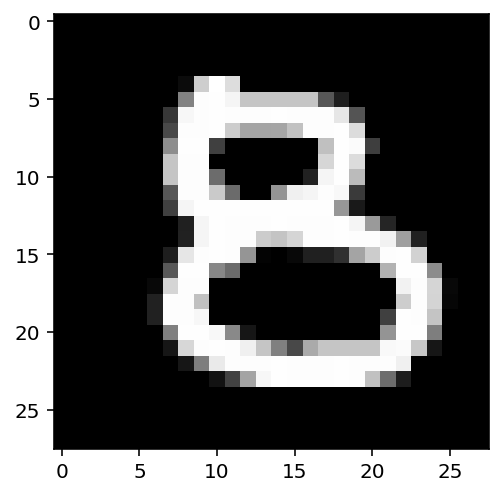

In [12]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [13]:
inputs = images.view(images.shape[0], -1)

hidden_units = 256
size, input_units = inputs.shape
output_units = 10

w1 = torch.randn(input_units, hidden_units)
# b1 = torch.randn(1, hidden_units)
b1 = torch.randn(hidden_units)

w2 = torch.randn(hidden_units, output_units)
# b2 = torch.randn(1, output_units)
b2 = torch.randn(output_units)

h = sigmoid_activation(torch.mm(inputs, w1) + b1)
output = sigmoid_activation(torch.mm(h, w2) + b2)

output.shape

torch.Size([64, 10])

In [14]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [15]:
probabilities = softmax(output)
print(probabilities.shape)
# Check for each image that if the summation of all the 10 probabilities is equal to 1
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch (OOP style):

In [16]:
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(in_features=784, out_features=256)
        self.output = nn.Linear(in_features=256, out_features=10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x


### Another way of building neural network

In [17]:
from torch import nn
import torch.nn.functional as F


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(in_features=784, out_features=256)
        self.output = nn.Linear(in_features=256, out_features=10)
    
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x))
        return x

model = NeuralNetwork()
model

NeuralNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

### Activation Functions
So far we've only been looking at the softmax activation, but in general any function can be used as an activation function. The only requirement is that for a network to approximate a non-linear function, **the activation functions must be non-linear**. A few more examples of common activation functions: **Tanh (hyperbolic tangent), and ReLU (rectified linear unit)**. In practice, the **ReLU function is used almost exclusively as the activation function for hidden layers**.

In [18]:
from torch import nn
import torch.nn.functional as F


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(in_features=784, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc_output = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc_output(x))
        return x

model = NeuralNetwork()
model

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc_output): Linear(in_features=64, out_features=10, bias=True)
)

## Building neural network using nn.Sequential

In [20]:
# import helper


# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]), 
    nn.ReLU(), 
    nn.Linear(hidden_sizes[0], hidden_sizes[1]), 
    nn.ReLU(), 
    nn.Linear(hidden_sizes[1], output_size), 
    nn.Softmax(dim=1),
)
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
images.shape
# images[0,:]
probabilities = model.forward(images[0, :])

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


## Using nn.Sequential and collections.OrderedDict

In [21]:
from collections import OrderedDict
model = nn.Sequential(
    OrderedDict([
        ('fc1', nn.Linear(input_size, hidden_sizes[0])),
        ('relu1', nn.ReLU()),
        ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
        ('relu2', nn.ReLU()),
        ('output', nn.Linear(hidden_sizes[1], output_size)),
        ('softmax', nn.Softmax(dim=1))
    ])
)

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [22]:
model.fc2

Linear(in_features=128, out_features=64, bias=True)

## Losses in PyTorch

In [23]:
# Build a feed-forward network
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# Define the loss
criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model.forward(images)
loss = criterion(logits, labels)
loss

tensor(2.2941, grad_fn=<NllLossBackward>)

**Exercise:** Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.

**Observation:** The following cell is equivalent to the above cell. Because, **nn.CrossEntropyLoss** is equal to **nn.LogSoftmax** followed by **nn.NLLLoss**

In [24]:
# Build a feed-forward network
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10), 
    nn.LogSoftmax(dim=1)
)

# Negative Log Likelihood Loss
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

log_probabilities = model.forward(images)
loss = criterion(log_probabilities, labels)
loss

tensor(2.2998, grad_fn=<NllLossBackward>)

## Autograd

In [67]:
x = torch.randn(2, 2, requires_grad=True)
# x = torch.randn(2, requires_grad=True)
print(x)

tensor([[-0.6356,  0.0943],
        [-1.8824, -0.1884]], requires_grad=True)


In [68]:
y = x**2
print(y)

tensor([[0.4040, 0.0089],
        [3.5433, 0.0355]], grad_fn=<PowBackward0>)


In [69]:
z = y.mean()
print(z)

tensor(0.9979, grad_fn=<MeanBackward0>)


In [70]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.3178,  0.0471],
        [-0.9412, -0.0942]])
tensor([[-0.3178,  0.0471],
        [-0.9412, -0.0942]], grad_fn=<DivBackward0>)


## Training for real

In [76]:
from torch import optim

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# images, labels = next(iter(trainloader))
# images = images.view(images.shape[0], -1)

epochs = 10

for i in range(epochs):
    training_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        # Clearing previous gradient
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        # Call .backward() to calculate backpropagation
        loss.backward()
        optimizer.step()
        
        training_loss += loss.item()
    else:
        print('Training Loss:', training_loss/len(trainloader))


Training Loss: 1.002637695163679
Training Loss: 0.3765400700541193
Training Loss: 0.31901792679101165
Training Loss: 0.287627435275423
Training Loss: 0.26293736365018117
Training Loss: 0.2408696306365004
Training Loss: 0.22221980906371622
Training Loss: 0.2050559350819603
Training Loss: 0.19047781141169035
Training Loss: 0.17715509816495847


## Testing

In [80]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

image = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(image)
ps = torch.exp(logps)
ps
# helper.view_classify(img.view(1, 28, 28), ps)

tensor([[1.2653e-02, 3.4436e-05, 8.1184e-01, 9.5075e-02, 1.4501e-04, 1.3519e-03,
         1.4607e-03, 3.1473e-05, 7.6433e-02, 9.7586e-04]])

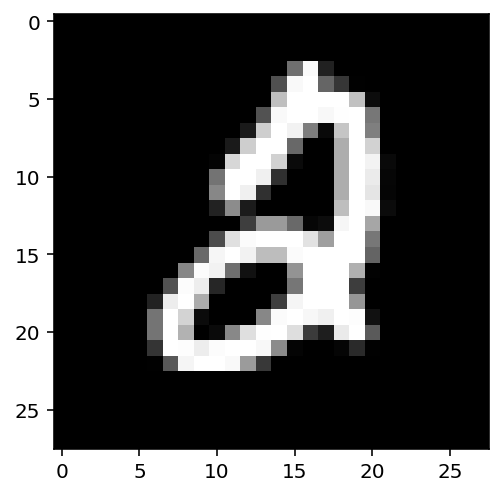

In [82]:
plt.imshow(image.view(28,28).numpy().squeeze(), cmap='Greys_r')